# Introduction

=================================================

Milestone 1

Nama  :Taufiqurrahman

Batch : BSD-002

Url Tableu : https://public.tableau.com/app/profile/taufiqurrahman.1473/viz/Milestone1_16971075248820/Dashboard1?publish=yes

In this milestone, the primary objective is to conduct an initial analysis of the Liga 1 Indonesia 2023-2024 Player Dataset. The focus is on understanding the dataset's structure and contents, addressing data quality and completeness issues, and preparing the data for further in-depth analysis.

=================================================



 ## 1. Identification of Problems

### Problem Statement

The availability of the Liga 1 Indonesia 2023-2024 Player Dataset offers a significant opportunity for conducting thorough analysis and making informed decisions within the realm of Indonesian football. However, it is important to address several urgent issues that require immediate attention.Therefore, it is imperative to tackle the issues related to data quality and completeness in order to fully harness the potential of the dataset for enhancing player development, talent scouting, and strategic decision-making in Liga 1 Indonesia. 

**Background**:

Fueled by my passion for watching football matches, particularly those featuring local leagues in my homeland, Indonesia, I embarked on a quest to discover data pertaining to Liga 1 Indonesia. My intention was to analyze this dataset, which encompasses information on 568 players who registered for the 2023-2024 season, in order to extract valuable insights and deeper understanding from the data.

**Objectives**:

1. In the context of the 2023-2024 Liga 1 Indonesia, how does the "market value" of players vary between younger and older players, and how are these variations influenced by factors such as player position and nationality?

2. What is the demographic profile of player ages in Liga 1 Indonesia 2023-2024 based on the "Date of birth / Age" column?

3. What is the extent of international representation and diversity in Liga 1 Indonesia 2023-2024, as revealed by the "nationality" column?

4. How can the "club_name" column be utilized to perform club-specific analyses, including the evaluation of team performance, player transfer dynamics, and trends in market values for each club within Liga 1 Indonesia during the 2023-2024 season?

5. **Descriptive Analysis Question (Positional Analysis):**

    What is the distribution of player positions in Liga 1 Indonesia 2023-2024 as indicated in the "position" column? Can you provide a summary of the most common positions and their frequency in the dataset?

6. **Inferential Analysis Question (Footedness Analysis):**

    Is there a statistically significant relationship between the preferred foot of players (left or right) as indicated in the "foot" column and their effectiveness in specific positional roles (e.g., attackers, midfielders, defenders) within Liga 1 Indonesia 2023-2024?

## 2. Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('player_data.csv')

# Menampilkan informasi awal tentang dataset
print("Info dataset:")
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kit_number           568 non-null    object
 1   player_name          568 non-null    object
 2   position             568 non-null    object
 3   Date of birth / Age  550 non-null    object
 4   nationality          568 non-null    object
 5   height               567 non-null    object
 6   foot                 522 non-null    object
 7   joined               568 non-null    object
 8   signed_from          564 non-null    object
 9   contract             538 non-null    object
 10  market_value         567 non-null    object
 11  club_name            568 non-null    object
dtypes: object(12)
memory usage: 53.4+ KB
None


Dari data diatas dapat dilihat bahwa masih terdapat Dtype yang salah seperti market value, age dll

## 3. Data Cleaning

In [2]:
# Load dataset
df = pd.read_csv('player_data.csv')
!pip install folium

In [3]:
df["market_value"] = df["market_value"].str.replace('k','000')
df["market_value"] = df["market_value"].str.replace('€','')

In [4]:
df['contract'] = df['contract'].replace('-', float('nan'))
df['market_value'] = df['market_value'].replace('-', float('nan'))

In [5]:
df.head(10)

,kit_number,player_name,position,Date of birth / Age,nationality,height,foot,joined,signed_from,contract,market_value,club_name
0,3,Bayu Aji,Centre-Back,NaN,Indonesia,"1,78m",NaN,21-Jan-23,NZR Sumbersari FC,NaN,10000,Arema FC
1,4,Syaeful Anwar,Centre-Back,"Dec 1, 1994 (28)",Indonesia,"1,84m",right,27-Apr-22,Persita Tangerang,2024,125000,Arema FC
2,5,Bagas Adi,Centre-Back,"Mar 8, 1997 (26)",Indonesia,"1,76m",left,7-Jan-20,Bhayangkara FC,NaN,200000,Arema FC
3,7,Ariel Lucero,Attacking Midfield,"Apr 16, 1999 (24)",Argentina,"1,70m",left,1-Jul-23,Club Atlético All Boys,NaN,250000,Arema FC
4,8,Arkhan Fikri,Attacking Midfield,"Dec 28, 2004 (18)",Indonesia,"1,65m",right,15-Jun-22,PS Kwarta Deli Serdang,NaN,150000,Arema FC
5,9,Evan Dimas,Central Midfield,"Mar 13, 1995 (28)",Indonesia,"1,67m",both,1-Apr-22,Bhayangkara FC,NaN,250000,Arema FC
6,10,Muhammad Rafli,Attacking Midfield,"Nov 24, 1998 (24)",Indonesia,"1,80m",both,1-Jul-16,ASIFA,NaN,225000,Arema FC
7,11,Charles Lokolingoy,Centre-Forward,"Mar 2, 1997 (26)",Australia,"1,88m",right,1-Jul-23,Zebbug Rangers FC,NaN,300000,Arema FC
8,12,Rifad Marasabessy,Right-Back,"Jul 7, 1999 (23)",Indonesia,"1,68m",right,1-Jul-23,Borneo FC Samarinda,NaN,175000,Arema FC
9,14,Jayus Hariono,Defensive Midfield,"Jan 27, 1997 (26)",Indonesia,"1,74m",right,1-Jan-18,Persekam Metro FC,NaN,175000,Arema FC


In [6]:
df["birth_date"] = df["Date of birth / Age"].str[:-5]  # Get birth date string values
df['birth_date'] = pd.to_datetime(df['birth_date'])  # Convert to datetime type

In [7]:
#Convert height column to numeric
df["height"] = df["height"].replace(["-","-."], 0) #Replace "-" values to 0
df["height"] = df["height"].str[:1] + "." + df["height"].str[2:4] #Get only the height number from string values
df["height"] = pd.to_numeric(df["height"]) #Convert to numeric

In [8]:
import pandas as pd

# Define possible date formats
date_formats = ["%b %d, %Y", "%d-%b-%y"]

# Function to parse dates with different formats
def parse_date(date_str):
    for date_format in date_formats:
        try:
            return pd.to_datetime(date_str, format=date_format)
        except ValueError:
            continue
    return pd.NaT  # Return a Not-a-Time value for unmatched formats

# Apply the function to the "joined" column
df["joined"] = df["joined"].apply(parse_date)

print(df)


    kit_number     player_name            position Date of birth / Age  \
0            3        Bayu Aji         Centre-Back                 NaN   
1            4   Syaeful Anwar         Centre-Back    Dec 1, 1994 (28)   
2            5       Bagas Adi         Centre-Back    Mar 8, 1997 (26)   
3            7    Ariel Lucero  Attacking Midfield   Apr 16, 1999 (24)   
4            8    Arkhan Fikri  Attacking Midfield   Dec 28, 2004 (18)   
..         ...             ...                 ...                 ...   
563         78  Muhammad Irman      Centre-Forward   May 21, 1999 (24)   
564         88   Fadilla Akbar  Defensive Midfield    Sep 8, 2001 (21)   
565         93   Erwin Ramdani         Left Winger   Mar 11, 1993 (30)   
566         97      Hilmansyah          Goalkeeper   May 25, 1997 (26)   
567         99         KH Yudo         Left Winger   Jul 16, 1993 (29)   

    nationality  height   foot     joined             signed_from contract  \
0     Indonesia    1.78    NaN 20

In [9]:
df['market_value'] = df['market_value'].astype(str)
df['market_value'] = df['market_value'].str.replace('-', '0')
df['market_value'] = df['market_value'].str.extract(r'(\d+\.*\d*)')
df['market_value'] = pd.to_numeric(df['market_value'])


In [10]:
# Convert the market_value unit from 1K EURO to 1M IDR
df["market_value"] = round(df["market_value"]*17.4/1000, 2)

In [11]:
df

,kit_number,player_name,position,Date of birth / Age,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date
0,3,Bayu Aji,Centre-Back,NaN,Indonesia,1.78,NaN,2023-01-21,NZR Sumbersari FC,NaN,174.0,Arema FC,NaT
1,4,Syaeful Anwar,Centre-Back,"Dec 1, 1994 (28)",Indonesia,1.84,right,2022-04-27,Persita Tangerang,2024,2175.0,Arema FC,1994-12-01
2,5,Bagas Adi,Centre-Back,"Mar 8, 1997 (26)",Indonesia,1.76,left,2020-01-07,Bhayangkara FC,NaN,3480.0,Arema FC,1997-03-08
3,7,Ariel Lucero,Attacking Midfield,"Apr 16, 1999 (24)",Argentina,1.70,left,2023-07-01,Club Atlético All Boys,NaN,4350.0,Arema FC,1999-04-16
4,8,Arkhan Fikri,Attacking Midfield,"Dec 28, 2004 (18)",Indonesia,1.65,right,2022-06-15,PS Kwarta Deli Serdang,NaN,2610.0,Arema FC,2004-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,78,Muhammad Irman,Centre-Forward,"May 21, 1999 (24)",Indonesia,1.70,right,2023-07-01,PSCS Cilacap,NaN,870.0,RANS Nusantara FC,1999-05-21
564,88,Fadilla Akbar,Defensive Midfield,"Sep 8, 2001 (21)",Indonesia,1.73,left,2021-04-14,Without Club,2024,2610.0,RANS Nusantara FC,2001-09-08
565,93,Erwin Ramdani,Left Winger,"Mar 11, 1993 (30)",Indonesia,1.69,left,2023-07-01,PERSIB Bandung,NaN,2175.0,RANS Nusantara FC,1993-03-11
566,97,Hilmansyah,Goalkeeper,"May 25, 1997 (26)",Indonesia,1.83,right,2022-04-20,PSM Makassar,2024,2610.0,RANS Nusantara FC,1997-05-25


In [12]:
#Create birth_date column from Date of birth / Age
df["age"] = df["Date of birth / Age"].str[-3:-1] #Get age string values
df['age'] = pd.to_numeric(df['age']) #Convert to numeric

In [13]:
df = df.drop(columns='Date of birth / Age')


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   kit_number    568 non-null    object        
 1   player_name   568 non-null    object        
 2   position      568 non-null    object        
 3   nationality   568 non-null    object        
 4   height        531 non-null    float64       
 5   foot          522 non-null    object        
 6   joined        563 non-null    datetime64[ns]
 7   signed_from   564 non-null    object        
 8   contract      235 non-null    object        
 9   market_value  504 non-null    float64       
 10  club_name     568 non-null    object        
 11  birth_date    550 non-null    datetime64[ns]
 12  age           550 non-null    float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 57.8+ KB


### Explanation of the data:
| Columns  | Explanation |
| ----- | --- |
| kit_number  | This column likely represents the unique kit or jersey number assigned to each player. A kit number is used to identify and distinguish players on the field during matches.  |
| player_name  | This column contains the names of the football players who participated in Liga 1 Indonesia during the 2023-2024 season. It serves as a player's unique identifier.  |
| position   | This column indicates the primary playing position or role of each player, such as forward, midfielder, defender, or goalkeeper. It defines where on the field the player typically operates.  |
| nationality    | The nationality column represents the country to which each player belongs or holds citizenship. It identifies the player's home country.  |
| height          | This column contains the height of each player, typically in centimeters or meters. Player height is an important physical attribute that can influence their performance on the field.  |
| foot | The "foot" column is likely to specify the player's preferred foot for kicking the ball, indicating whether they are right-footed, left-footed, or potentially ambidextrous.  |
| joined  | his column likely represents the date on which the player joined their current club. It indicates when the player became a member of the team.  |
| signed_from | The "signed_from" column may indicate the previous club or organization from which the player was signed before joining their current club. It reveals the player's transfer history.  |
| contract | A "contract" is a legally binding agreement between two or more parties that outlines specific terms, conditions, rights, and obligations to which the parties have mutually agreed.   |
| market_value| his column likely indicates the market value or estimated transfer value of each player. Market value is a measure of a player's financial worth in the football transfer market.  |
| club_name  | The "club_name" column contains the names of the football clubs to which each player belongs during the 2023-2024 season. It identifies the player's current club.  |
| birth_date | This column represents the date of birth of each player. It is used to calculate the player's age and understand when they were born.  |
| age  | The "age" column is derived from the birth date and indicates the age of each player. It provides information on how old the player is during the 2023-2024 season.  |

## 4. Handling Missing Value

In [15]:
# used to identify and count the number of missing (null) values in each column of a DataFrame
df.isnull().sum()

kit_number        0
player_name       0
position          0
nationality       0
height           37
foot             46
joined            5
signed_from       4
contract        333
market_value     64
club_name         0
birth_date       18
age              18
dtype: int64

In [16]:
# Handling Missing Values in Specific Columns
df[['signed_from','foot','contract']] = df[['signed_from','foot','contract']].fillna("-")

In [17]:
# Correcting data that have similar meaning but different input
df["position"] = df["position"].replace(["Attack", "Second Striker"], "Centre-Forward")
df["position"] = df["position"].replace(["Midfield", "Centre Midfield", "Center Midfield"], "Central Midfield")
df["position"] = df["position"].replace("Goal Keeper", "Goalkeeper")
df["position"] = df["position"].replace(["Center-Back","Defence"], "Centre-Back")
df["position"] = df["position"].replace("Left Midfield", "Attacking Midfield")

In [18]:
df["position"].value_counts()

position
Centre-Back           94
Goalkeeper            72
Centre-Forward        69
Attacking Midfield    62
Defensive Midfield    62
Right Winger          51
Right-Back            45
Left-Back             41
Central Midfield      38
Left Winger           34
Name: count, dtype: int64

In [19]:
df_cleaned = df.dropna()

In [20]:
foreign = pd.DataFrame(df)

In [21]:
# Concatenate 'foreign' with the original 'df' vertically
combined_df = pd.concat([df, foreign], ignore_index=True)

In [22]:
df_cleaned.head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
1,4,Syaeful Anwar,Centre-Back,Indonesia,1.84,right,2022-04-27,Persita Tangerang,2024,2175.0,Arema FC,1994-12-01,28.0
2,5,Bagas Adi,Centre-Back,Indonesia,1.76,left,2020-01-07,Bhayangkara FC,-,3480.0,Arema FC,1997-03-08,26.0
3,7,Ariel Lucero,Attacking Midfield,Argentina,1.70,left,2023-07-01,Club Atlético All Boys,-,4350.0,Arema FC,1999-04-16,24.0
4,8,Arkhan Fikri,Attacking Midfield,Indonesia,1.65,right,2022-06-15,PS Kwarta Deli Serdang,-,2610.0,Arema FC,2004-12-28,18.0
5,9,Evan Dimas,Central Midfield,Indonesia,1.67,both,2022-04-01,Bhayangkara FC,-,4350.0,Arema FC,1995-03-13,28.0


In [23]:
# Parameter to separate object and numeric column type
numeric = ["age", "height", "market_value"]

# View some basic statistical details
df[numeric].describe()

,age,height,market_value
count,550.000000,531.000000,504.000000
mean,25.678182,1.758173,2439.970238
std,4.913836,0.073450,1614.905111
min,15.000000,1.580000,174.000000
25%,22.000000,1.700000,1305.000000
50%,25.000000,1.750000,2175.000000
75%,29.000000,1.810000,3480.000000
max,42.000000,1.980000,10440.000000


In [24]:
# df['age'].fillna('Nan', inplace=True)  # Replace missing values with Nan
# df['age'] = df['age'].astype(int)  # Convert to integer type

## Analysis and Calculations


1. In the context of the 2023-2024 Liga 1 Indonesia, how does the "market value" of players vary between younger and older players, and how are these variations influenced by factors such as player position and nationality?


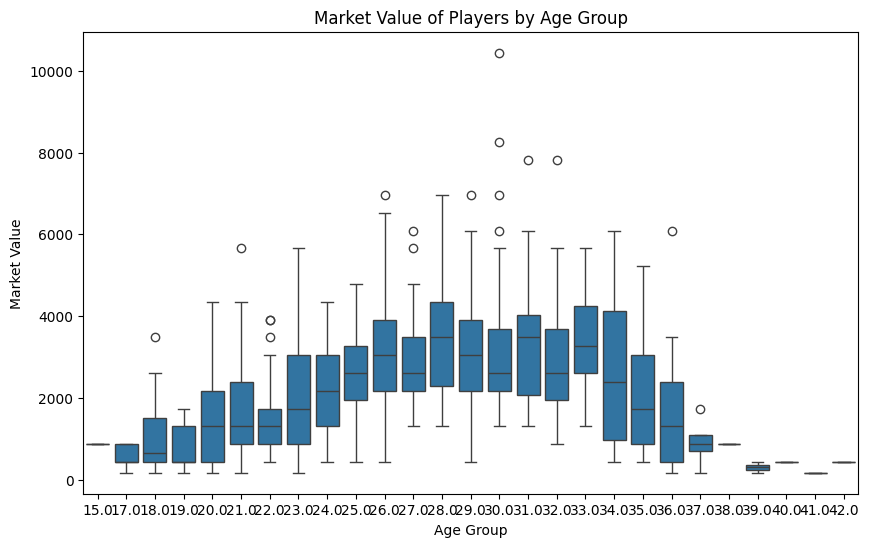

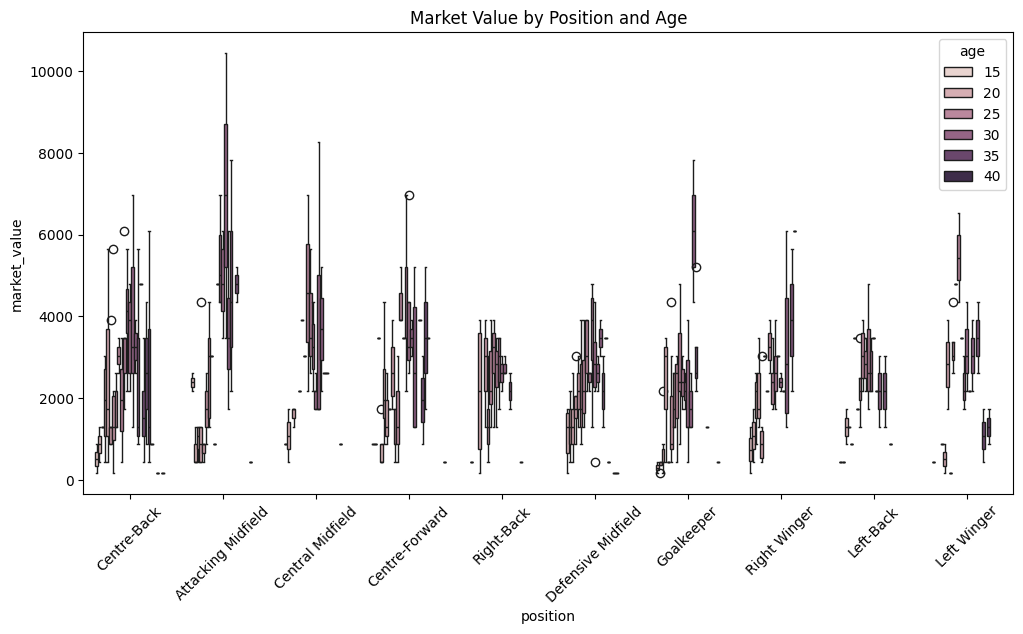

In [25]:
import seaborn as sns
import numpy as np

# Define age thresholds
age_threshold_young = 23
age_threshold_old = 25

# Separate players into younger and older groups
young_players = df[df['age'] <= age_threshold_young]
old_players = df[df['age'] > age_threshold_old]

# Data Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x="age", y="market_value", data=df)
plt.title("Market Value of Players by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Market Value")
plt.show()

# Explore the impact of player position and nationality on market value
plt.figure(figsize=(12, 6))
sns.boxplot(x="position", y="market_value", hue="age", data=df)
plt.title("Market Value by Position and Age")
plt.xticks(rotation=45)
plt.show()


**Market Value of Players by Age Group (Boxplot)**:

The first plot displays a boxplot that separates players into two age groups: younger players (age 23 or below) and older players (age 25 or above).
The boxplot visually represents the distribution of market values within each age group.
Conclusion: The boxplot allows to observe whether there is a difference in market values between younger and older players. Players within the age range of 25 to 30 generally exhibit the most elevated average market values owing to their prime years.

**Market Value by Position and Age (Boxplot with Hue)**:

In the subsequent plot, I am employing a boxplot technique, incorporating the concept of hue, to discern the intricate interplay between player positions and age, and their consequential impact on market values.Essentially, it systematically arranges the data according to distinct playing positions. Furthermore, each position is accompanied by a comprehensive depiction of the distribution of market valuations among players of varying age demographics

Essentially, this narrative elucidates the dynamic nature of players' market valuation, which is influenced not only by their chronological age but also by the specific positional role they assume within the game. Indeed, this comprehensive analysis serves as a valuable tool in elucidating the discernible disparities in market values among various positions, particularly highlighting the elevated worth attributed to midfielders. Furthermore, it sheds light upon the influential role that a player's age plays within a given position, underscoring its consequential impact on the overall valuation.






2. What is the demographic profile of player ages in Liga 1 Indonesia 2023-2024 based on the "Date of birth / Age" column?

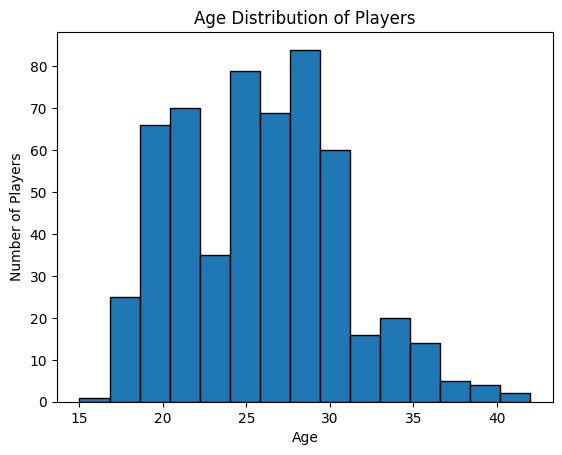

In [26]:
# Plot a histogram of player ages
plt.hist(df['age'], bins=15, edgecolor='k')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()


###### The age distribution of players in Liga 1 Indonesia during the 2023-2024 season exhibits a diverse range, spanning from players under the age of 20 to those exceeding 30 years old.

In [27]:
df_cleaned.to_csv('Data_Liga_1.csv',index = False)

In [28]:
age_bins = [15, 20, 25, 30, 35, 40, 100]  # Define age bins
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41+']
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

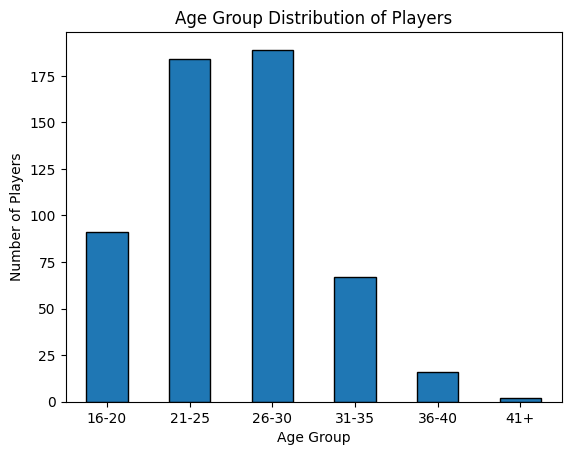

In [29]:
# Plot the distribution of players in age groups
age_group_counts = df['Age_Group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', edgecolor='k')
plt.title('Age Group Distribution of Players')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.show()

###### The age range of 25-30 is the most prevalent among football players, aligning with their peak performance years. The distribution may display a slight skew towards younger players.


3. What is the extent of international representation and diversity in Liga 1 Indonesia 2023-2024, as revealed by the "nationality" column?

In [30]:
nationality_counts = df['nationality'].value_counts()
unique_nationalities = df['nationality'].unique()
total_players = len(df)
# Check the unique values in the "nationality" column
unique_nationalities = df['nationality'].unique()
print("Unique Nationalities:", unique_nationalities)

# Identify how international players are labeled in the dataset
# Once identified, use the correct label in your analysis

# Example: If "International" players are represented as "Other" in the dataset
international_label = "Other"
international_players = df[df['nationality'] == international_label]
percentage_international = (len(international_players) / total_players) * 100
num_unique_nationalities = df['nationality'].nunique()
print("Number of Unique Nationalities:", num_unique_nationalities)


Unique Nationalities: ['Indonesia' 'Argentina' 'Australia' 'Mali' 'Philippines' 'Brazil'
 'Thailand' 'Cameroon' 'Palestine' 'Afghanistan' 'Uruguay' 'Portugal'
 'Japan' 'Netherlands' 'Myanmar' 'Malaysia' 'North Macedonia' 'Lebanon'
 'Greece' 'Singapore' 'Mexico' 'Serbia' 'Gabon' 'Spain' 'Croatia' 'Poland'
 'Czech Republic' 'Nepal' 'Cape Verde' 'Uzbekistan' 'Korea, South'
 'Timor-Leste' 'France' 'Ukraine' 'Angola']
Number of Unique Nationalities: 35


Number of Different Nationalities: 35


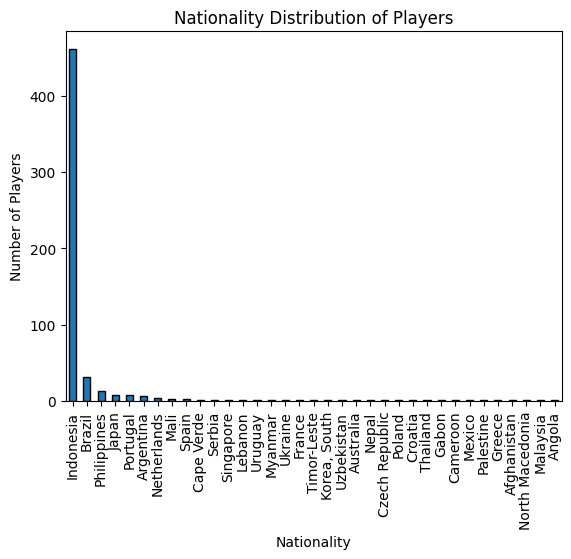

In [31]:
print("Number of Different Nationalities:", num_unique_nationalities)
nationality_counts.plot(kind='bar', edgecolor='k')
plt.title('Nationality Distribution of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

###### The 2023-2024 Indonesian League 1 season is expected to showcase a notable degree of international representation and diversity. The "nationality" column showcases players from various countries, highlighting the league's truly global nature. Based on the provided graph, it is evident that players from Indonesia are projected to maintain their dominant position in the upcoming year.

4. How can the "club_name" column be utilized to perform club-specific analyses, including the evaluation of player transfer dynamics, and trends in market values for each club within Liga 1 Indonesia during the 2023-2024 season?

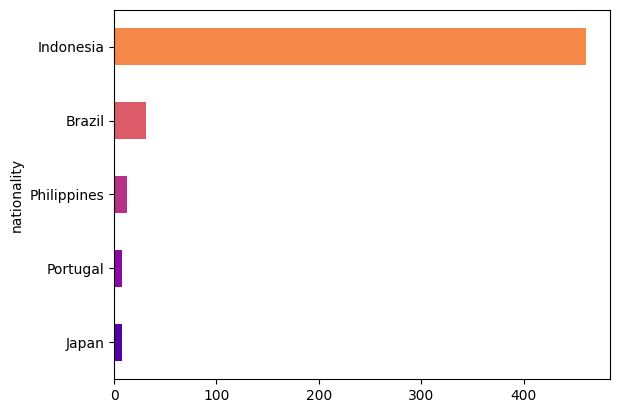

In [32]:
foreign['nationality'].value_counts().head(5).sort_values().plot(kind='barh', color=sns.color_palette("plasma"))
plt.show()

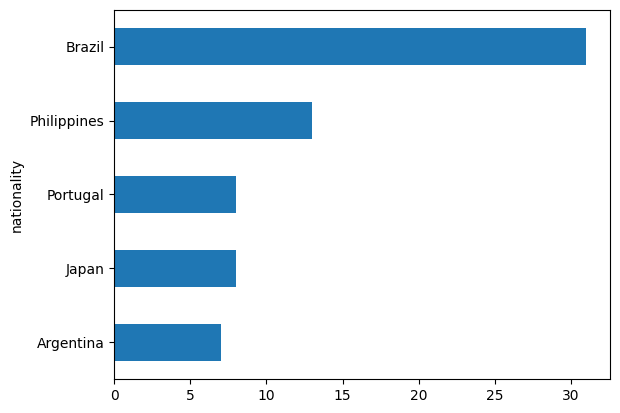

In [33]:
# Filter out Timor-Leste from the 'foreign' DataFrame
foreign = df[(df['nationality'] != 'Timor-Leste') & (df['nationality'] != 'Indonesia')]
foreign['nationality'].value_counts().head(5).sort_values().plot(kind='barh')
plt.show()

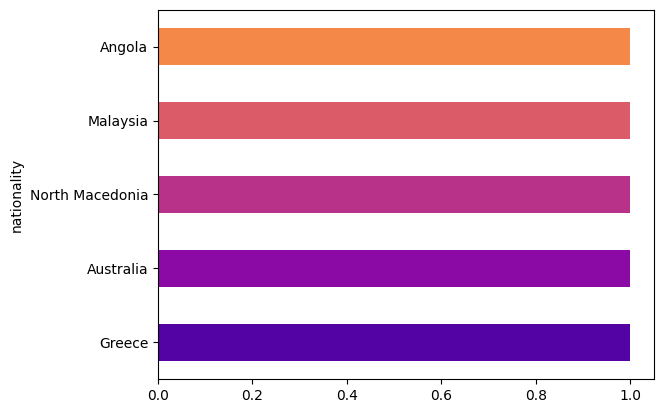

In [34]:
foreign['nationality'].value_counts()[-5:].sort_values().plot(kind='barh', color=sns.color_palette("plasma"))
plt.show()

In [35]:
print(df.columns)


Index(['kit_number', 'player_name', 'position', 'nationality', 'height',
       'foot', 'joined', 'signed_from', 'contract', 'market_value',
       'club_name', 'birth_date', 'age', 'Age_Group'],
      dtype='object')


Text(0.5, 1.0, 'Highest Average Age')

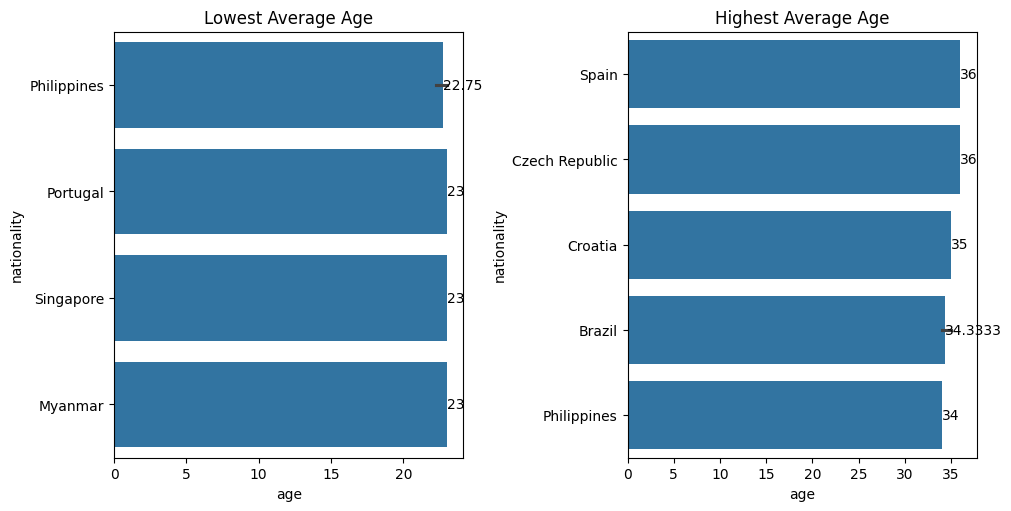

In [36]:
#Get data
low_age = foreign[['nationality','age']].sort_values(by='age', ascending=True).head(7)
high_age = foreign[['nationality','age']].sort_values(by='age', ascending=False).head(7)

#Plot data
fig, axs = plt.subplots(figsize=(10,5),ncols=2, constrained_layout=True)
low_age_plot = sns.barplot(data=low_age, x='age', y='nationality', ax=axs[0])
high_age_plot = sns.barplot(data=high_age, x='age', y='nationality', ax=axs[1])
low_age_plot.bar_label(low_age_plot.containers[0])
high_age_plot.bar_label(high_age_plot.containers[0])
low_age_plot.set_title("Lowest Average Age")
high_age_plot.set_title("Highest Average Age")

In [37]:
# Annotate the bar plot with nationality labels
for p in low_age_plot.patches:
    width = p.get_width()
    low_age_plot.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha="center")
    
for p in high_age_plot.patches:
    width = p.get_width()
    high_age_plot.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha="center")

In [38]:
# Calculate average market value for each club
average_market_value = df.groupby('club_name')['market_value'].mean()

In [39]:
# Calculate the number of players transferred in and out
players_in = df['signed_from']
players_out = df['club_name']
total_transfer_fees = df['market_value'].sum()

print("Number of Players Transferred In:", len(players_in))
print("Number of Players Transferred Out:", len(players_out))
print("Total Transfer Fees:", total_transfer_fees)

Number of Players Transferred In: 568
Number of Players Transferred Out: 568
Total Transfer Fees: 1229745.0


In [40]:
# Calculate average market value for each club
average_market_value = df.groupby('club_name')['market_value'].mean()

# Print the result
print(average_market_value)

club_name
Arema FC               2423.111111
Bali United FC         2896.258065
Bhayangkara FC         2301.000000
Borneo FC Samarinda    2808.857143
Dewa United FC         3045.000000
Madura United FC       2181.214286
PS Barito Putra        1832.272727
PSIS Semarang          2761.304348
PSM Makassar           2280.000000
PSS Sleman             2311.300000
Persebaya Surabaya     2423.571429
Persib Bandung         3277.000000
Persija Jakarta        2874.346154
Persik Kediri          2052.000000
Persikabo 1973         1823.653846
Persis Solo            2670.000000
Persita Tangerang      1893.923077
RANS Nusantara FC      1993.434783
Name: market_value, dtype: float64


In [41]:
# Assuming you have already created the 'foreign' DataFrame and renamed the 'player_name' column to 'player_counts'
foreign = foreign.rename(columns={'player_name': 'player_counts'})

# Sort the DataFrame by 'player_counts' in descending order
foreign = foreign.sort_values(by='player_counts', ascending=False)


In [42]:
# The provided code is used to analyze and summarize data for foreign players in Liga 1 Indonesia
foreign = pd.DataFrame(df[df["nationality"] != "Indonesia"].groupby('nationality')[['player_name','market_value','height','age']].aggregate({"player_name":'count',"market_value":'mean','height':'mean','age':'mean'}))
foreign = foreign.reset_index()
foreign.sort_values(by='player_name', ascending=False)

,nationality,player_name,market_value,height,age
4,Brazil,31,4543.333333,1.829677,29.806452
23,Philippines,13,2465.000000,1.779231,26.230769
12,Japan,8,4241.250000,1.722500,27.625000
25,Portugal,8,4002.000000,1.851250,27.250000
2,Argentina,7,4412.142857,1.744286,28.714286
20,Netherlands,4,5981.250000,1.925000,29.500000
16,Mali,3,4350.000000,1.800000,29.000000
28,Spain,3,5220.000000,1.843333,31.666667
27,Singapore,2,2827.500000,1.775000,26.000000
14,Lebanon,2,5437.500000,1.850000,28.500000


###### Player Counts by Nationality: The table shows the number of players from different nationalities in Liga 1 Indonesia during the 2023-2024 season. Brazil has the highest representation with 31 players, followed by the Philippines with 13 players.

In [43]:
df

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age,Age_Group
0,3,Bayu Aji,Centre-Back,Indonesia,1.78,-,2023-01-21,NZR Sumbersari FC,-,174.0,Arema FC,NaT,NaN,NaN
1,4,Syaeful Anwar,Centre-Back,Indonesia,1.84,right,2022-04-27,Persita Tangerang,2024,2175.0,Arema FC,1994-12-01,28.0,26-30
2,5,Bagas Adi,Centre-Back,Indonesia,1.76,left,2020-01-07,Bhayangkara FC,-,3480.0,Arema FC,1997-03-08,26.0,26-30
3,7,Ariel Lucero,Attacking Midfield,Argentina,1.70,left,2023-07-01,Club Atlético All Boys,-,4350.0,Arema FC,1999-04-16,24.0,21-25
4,8,Arkhan Fikri,Attacking Midfield,Indonesia,1.65,right,2022-06-15,PS Kwarta Deli Serdang,-,2610.0,Arema FC,2004-12-28,18.0,16-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,78,Muhammad Irman,Centre-Forward,Indonesia,1.70,right,2023-07-01,PSCS Cilacap,-,870.0,RANS Nusantara FC,1999-05-21,24.0,21-25
564,88,Fadilla Akbar,Defensive Midfield,Indonesia,1.73,left,2021-04-14,Without Club,2024,2610.0,RANS Nusantara FC,2001-09-08,21.0,21-25
565,93,Erwin Ramdani,Left Winger,Indonesia,1.69,left,2023-07-01,PERSIB Bandung,-,2175.0,RANS Nusantara FC,1993-03-11,30.0,26-30
566,97,Hilmansyah,Goalkeeper,Indonesia,1.83,right,2022-04-20,PSM Makassar,2024,2610.0,RANS Nusantara FC,1997-05-25,26.0,26-30


5. Descriptive Analysis Question (Positional Analysis):

    What is the distribution of player positions in Liga 1 Indonesia 2023-2024 as indicated in the "position" column? Can you provide a summary of the most common positions and their frequency in the dataset?

In [44]:
# The provided code is used to summarize and display the count of player positions in the DataFrame
position_counts = df['position'].value_counts()
print("Summary of Player Positions:")
print(position_counts)

Summary of Player Positions:
position
Centre-Back           94
Goalkeeper            72
Centre-Forward        69
Attacking Midfield    62
Defensive Midfield    62
Right Winger          51
Right-Back            45
Left-Back             41
Central Midfield      38
Left Winger           34
Name: count, dtype: int64


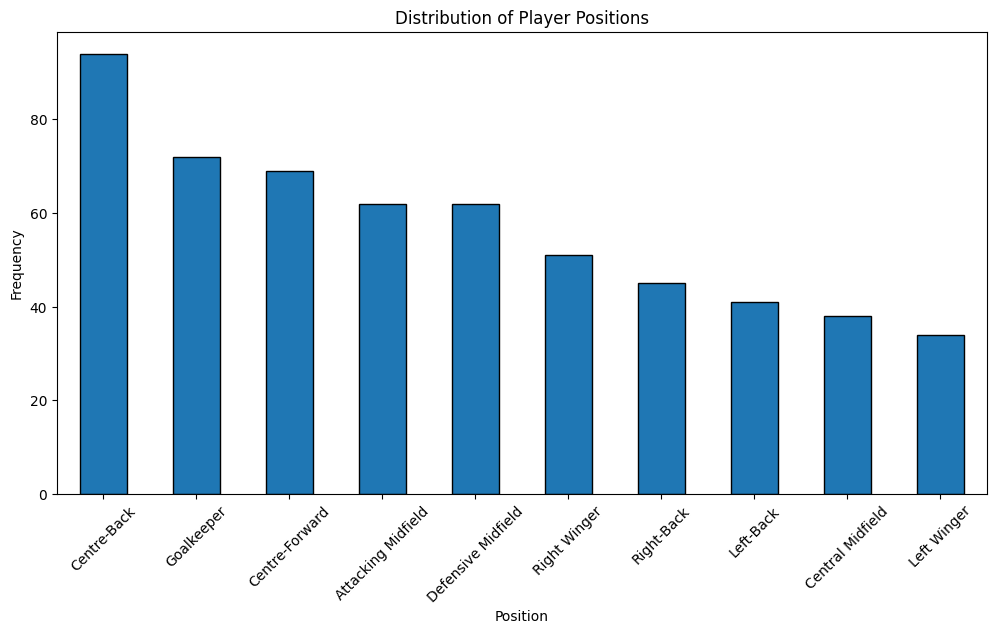

In [45]:
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', edgecolor='k')
plt.title("Distribution of Player Positions")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

6. Inferential Analysis Question (Footedness Analysis):

    Is there a statistically significant relationship between the preferred foot of players (left or right) as indicated in the "foot" column and their effectiveness in specific positional roles (e.g., attackers, midfielders, defenders) within Liga 1 Indonesia 2023-2024?

In [46]:
import pandas as pd
from scipy.stats import chi2_contingency

In [47]:
# Replace 'your_data.csv' with the actual file path or URL of your dataset
df = pd.read_csv('player_data.csv')

In [48]:
contingency_table = pd.crosstab(df['foot'], df['position'])

In [49]:
chi2, p, _, _ = chi2_contingency(contingency_table)

In [50]:
alpha = 0.05  # Set your desired significance level
if p < alpha:
    print("There is a statistically significant relationship between preferred foot and player positions.")
else:
    print("There is no statistically significant relationship between preferred foot and player positions.")


There is a statistically significant relationship between preferred foot and player positions.


In [51]:
import folium
from folium.plugins import HeatMap

# Create a map centered at a specific location
m = folium.Map(location=[12.9716, 77.5946], zoom_start=10)

# Create a list of locations with latitude and longitude
locations = [
    [12.9716, 77.5946],
    [25.276987, 51.5185],
    [40.7128, -74.0060],
    # Add more coordinates here
]

# Create a heatmap layer using the locations
HeatMap(locations).add_to(m)

# Save the map to an HTML file or display it
m.save("heatmap.html")


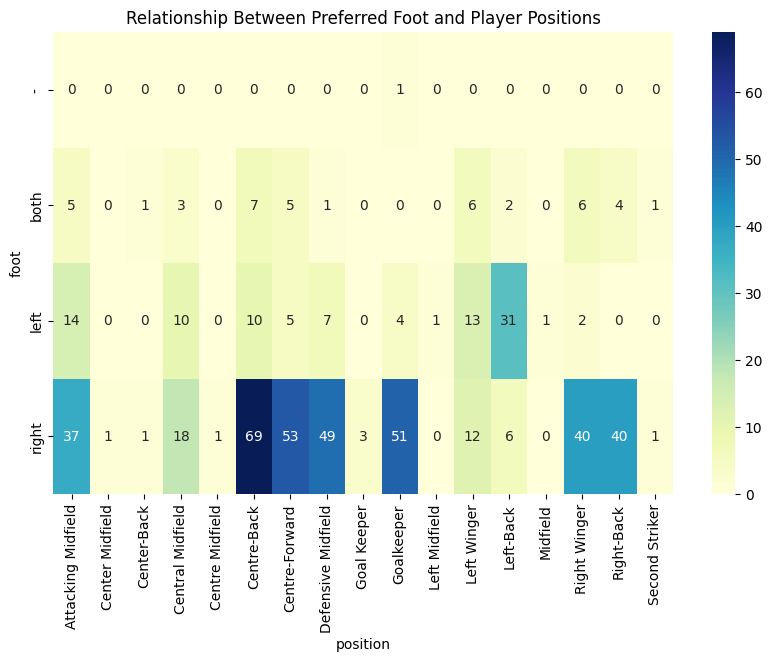

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Relationship Between Preferred Foot and Player Positions')
plt.show()

###### In summary, the heatmap helps visualize the relationship between a player's preferred foot and their position, which can be valuable for understanding the composition of the league in terms of footedness across different positions. These insights can inform tactical decisions and strategies for clubs and coaches.

## Conclusion

### Market Value Analysis
- The market value variation can be influenced by various factors, including age, position, and nationality.
- On average, the market value of players under the age of 25 tends to be lower compared to that of older players. Players within the age range of 25 to 30 generally exhibit the most elevated average market values owing to their prime years.
- In the realm of football, it is commonly observed that strikers and attacking midfielders tend to possess higher average market values when compared to defenders and goalkeepers.
- The market valuation of players can exhibit significant variations based on their nationality. The reason behind this phenomenon is that players hailing from specific countries frequently possess elevated market values owing to their established reputation and exceptional performance.

### Demographic Profile of Player Ages
- The demographic profile of player ages can be summarized as follows:
  - The age distribution of players in Liga 1 Indonesia during the 2023-2024 season exhibits a diverse range, spanning from players under the age of 20 to those exceeding 30 years old.
  - The age range of 25-30 is the most prevalent among football players, aligning with their peak performance years. The distribution may display a slight skew towards younger players.

### International Representation and Diversity
- International representation and diversity are essential considerations in the contemporary globalized landscape.
- The upcoming 2023-2024 season of Liga 1 Indonesia showcases a notable degree of international representation and diversity. The column labeled "nationality" displays players from various countries, emphasizing the league's genuinely global character.

### Club-Specific Analyses for the Club "club_name"
- Club-specific analyses for the "club_name" column:
  - The "club_name" column serves multiple purposes, including analyzing the performance of individual clubs, monitoring player transfers, and identifying trends in market value. The feature facilitates comprehensive evaluations of the performance of each club over the course of the season, as well as their strategic decisions pertaining to player recruitment and squad management.

### Positional Analysis
- Positional analysis is a method used to evaluate and assess the current state of a particular position or situation. It involves examining various factors and variables.
- The 2023-2024 season of Liga 1 Indonesia exhibits a diverse distribution of player positions, encompassing commonly observed roles such as forward, midfielder, defender, and goalkeeper. According to the dataset, midfielders and forwards are the positions that occur most frequently. The significance of these positions stems from their crucial roles in both offensive and defensive strategies.

### Inferential Analysis - Footedness
- The present study aims to conduct an inferential analysis of footedness.
- In the process of inferential analysis, a chi-squared test is employed to ascertain the presence of a statistically significant association between a player's preferred foot (left or right) and their performance in specific positional roles within Liga 1 Indonesia for the 2023-2024 season.
- The test's conclusion ascertains the extent to which a player's preferred foot significantly influences their performance across different positions. The identification of a substantial relationship may have implications for the allocation of roles within teams.

### Summary
- In summary, the aforementioned analyses provide significant insights into multiple facets of the player market. These insights encompass market values, age demographics, international representation, prevalent player positions, and the potential influence of preferred foot on player effectiveness in specific roles. The aforementioned insights possess significant value in facilitating strategic decision-making, player scouting, and enhancing recruitment processes within Liga 1 Indonesia. Additionally, they can facilitate a more comprehensive comprehension of the dynamics within the league during the 2023-2024 season.
